## 1. Introdução

Para este projeto, foi sugerido a escolha de uma base de dados (dentre duas) para elaborarmos uma pergunta de nossa escolha. Fiz a opção pela base de dados do Titanic, que contém os dados de todos os tripulantes (sobreviventes e vítimas).

Perguntas escolhidas:

* Relação entre sexo e sobreviventes
* Relação entre faixa etária e sobreviventes

## 2. Importando as bibliotecas necessárias

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Importando o CSV

In [45]:
titanic_df = pd.read_csv('titanic_data.csv')

In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 4. Preenchendo os campos nulos

#### Obs: Entre os dados escolhidos para análise, podemos observar que alguns passageiros não estão com as idades preenchidas. Faremos a remoção destes valores para a não interferência na análise.

In [47]:
# Obtendo as idades não nulas

idades_naonulas = titanic_df[titanic_df['Age'].notnull()]

In [48]:
print idades_naonulas.groupby('Sex').size()

Sex
female    261
male      453
dtype: int64


#### Obs: Serão usados somente os passageiros que estiverem com a idade atribuída, removeremos o restante do DataFrame

In [49]:
titanic_df = idades_naonulas

In [50]:
# Checando que os valores foram preenchidos

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


## 5. Limpando as colunas não utilizadas

In [51]:
# Limpando as colunas Pclass, Name, Ticket, SibSP, Parch, Ticket, Fare, Cabin e Embarked
titanic_df = titanic_df.drop(['Pclass', 'Name', 'Ticket','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


## 6. Melhorando a visualização dos Dados

In [53]:
# Modificando o campo sobrevivência dando nome de True e False para Sobrevivente
survived_map = {0: 'Falso' , 1: 'Verdadeiro'}
titanic_df['Survived'] = titanic_df['Survived'].map(survived_map)

In [54]:
titanic_df.head(5)

,PassengerId,Survived,Sex,Age
0,1,Falso,male,22.0
1,2,Verdadeiro,female,38.0
2,3,Verdadeiro,female,26.0
3,4,Verdadeiro,female,35.0
4,5,Falso,male,35.0


In [55]:
# Checando a idade máxima
titanic_df['Age'].max()

80.0

In [56]:
# Checando a idade mínima
titanic_df['Age'].min()

0.41999999999999998

In [57]:
# Agrupando idades por faixas etárias (de 10 em 10 anos)
faixa_idades = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

In [58]:
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 81, 10), labels=faixa_idades)

In [59]:
titanic_df['age_group'].iloc[630]

'10-19'

## 7. Analisando os Dados

### 7.1 Número de Sobreviventes

#### Primeiramente vamos analisar o número total de passageiros e o número total de homens e mulheres

In [60]:
# Número de Passageiros e números de sobreviventes (conforme o kaggle)
passageiros_kaggle = 2224
sobreviventes_kaggle = 722
naosobreviventes_kaggle = passageiros_kaggle - sobreviventes_kaggle

In [61]:
print passageiros_kaggle
print sobreviventes_kaggle
print naosobreviventes_kaggle

2224
722
1502


In [62]:
# Número de Passageiros e número de sobreviventes (conforme a amostra)
passageiros_sample = len(titanic_df)
sobreviventes_sample = len(titanic_df[titanic_df.Survived=='Verdadeiro'])
naosobreviventes_sample = passageiros_sample - sobreviventes_sample

In [63]:
print passageiros_sample
print sobreviventes_sample
print naosobreviventes_sample

714
290
424


In [64]:
sobreviventes_data = titanic_df[titanic_df.Survived=='Verdadeiro']
naosobreviventes_data = titanic_df[titanic_df.Survived=='Falso']

In [65]:
sobreviventes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 5 columns):
PassengerId    290 non-null int64
Survived       290 non-null object
Sex            290 non-null object
Age            290 non-null float64
age_group      290 non-null category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 11.7+ KB


In [66]:
naosobreviventes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    424 non-null int64
Survived       424 non-null object
Sex            424 non-null object
Age            424 non-null float64
age_group      424 non-null category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 17.0+ KB


In [67]:
# Calculando a porcentagem de sobreviventes (de acordo com a base do kaggle e com a amostra)
from __future__ import division
print "Total (Kaggle): {}".format(passageiros_kaggle)
print "Total de Sobreviventes (Kaggle): {} - {}{}".format(sobreviventes_kaggle, sobreviventes_kaggle/passageiros_kaggle * 100, '%')
print "Total de Não Sobreviventes (Kaggle): {} - {}{}".format(naosobreviventes_kaggle, naosobreviventes_kaggle/passageiros_kaggle * 100, '%')

Total (Kaggle): 2224
Total de Sobreviventes (Kaggle): 722 - 32.464028777%
Total de Não Sobreviventes (Kaggle): 1502 - 67.535971223%


In [68]:
from __future__ import division
print "Total (sample): {}".format(passageiros_sample)
print "Total de Sobreviventes (sample): {} - {}{}".format(sobreviventes_sample, sobreviventes_sample/passageiros_sample * 100, '%')
print "Total de Não Sobreviventes (sample): {} - {}{}".format(naosobreviventes_sample, naosobreviventes_sample/passageiros_sample * 100, '%')

Total (sample): 714
Total de Sobreviventes (sample): 290 - 40.6162464986%
Total de Não Sobreviventes (sample): 424 - 59.3837535014%


### Obs: Usaremos os dados do sample, pois estão condizentes com os dados da amostra total

## 8. Relação entre sexo e sobreviventes (Qual gênero tem a maior chance de sobrevicência?)

### 8.1 Hypothesis

#### H0 = O gênero não tem impacto na sobrevivência
#### HA = O gênero tem impacto na sobrevivência

In [69]:
tabela_sexo = pd.crosstab(titanic_df['Survived'],titanic_df['Sex'], margins=True)

In [70]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    714 non-null int64
Survived       714 non-null object
Sex            714 non-null object
Age            714 non-null float64
age_group      714 non-null category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 28.7+ KB


In [71]:
tabela_sexo.female.All

261

In [72]:
# Mulheres sobreviventes
from __future__ import division
print "Total de Mulheres: {}".format(tabela_sexo.female.All)
print "Total de Mulheres Sobreviventes: {}".format(tabela_sexo.male.Verdadeiro)
print "Porcentagem de Mulheres Sobreviventes: {}{}".format(tabela_sexo.female.Verdadeiro / tabela_sexo.female.All * 100, '%')

Total de Mulheres: 261
Total de Mulheres Sobreviventes: 93
Porcentagem de Mulheres Sobreviventes: 75.4789272031%


In [73]:
# Homens sobreviventes
from __future__ import division
print "Total de Homens: {}".format(tabela_sexo.male.All)
print "Total de Homens Sobreviventes: {}".format(tabela_sexo.male.Verdadeiro)
print "Porcentagem de Homens Sobreviventes: {}{}".format(tabela_sexo.male.Verdadeiro / tabela_sexo.male.All * 100, '%')

Total de Homens: 453
Total de Homens Sobreviventes: 93
Porcentagem de Homens Sobreviventes: 20.5298013245%


In [74]:
# Transformando novamente o campor Survived em Booleano
survived_map = {'Falso': False , 'Verdadeiro': True}
titanic_df['Survived'] = titanic_df['Survived'].map(survived_map)

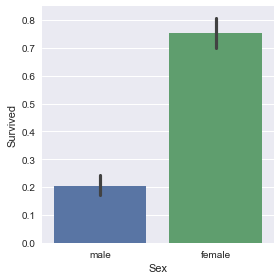

In [75]:
# Gráfico
sns.factorplot('Sex', 'Survived', data = titanic_df, kind = 'bar')

##### Baseados na amostra os números acima mostram um número maior de mulheres sobreveviventes em relação aos homens.

## 9. Relação entre idade e sobreviventes

### 9.1 Hypothesis

#### H0 = A idade não tem impacto na sobrevivência
#### HA = A idade tem impacto na sobrevivência

### 9.2 Recarregando os dados (sem eliminar as idades em branco)

In [76]:
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df = titanic_df.drop(['Pclass', 'Name', 'Ticket','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
survived_map = {0: 'Falso' , 1: 'Verdadeiro'}
titanic_df['Survived'] = titanic_df['Survived'].map(survived_map)
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 81, 10), labels=faixa_idades)

In [77]:
tabela_idade = pd.crosstab(titanic_df['Survived'],titanic_df['age_group'], margins=True)

In [78]:
tabela_idade

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80,All
Survived,,,,,,,,,
Falso,26,71,146,86,53,25,13,4,424
Verdadeiro,38,44,84,69,33,17,4,1,290
All,64,115,230,155,86,42,17,5,714


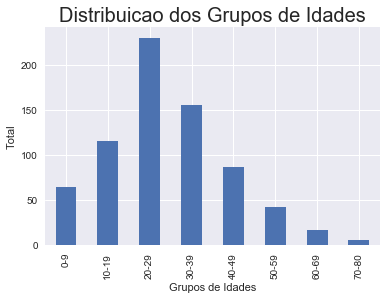

In [79]:
# Criação do gráfico
%matplotlib inline
titanic_df.groupby(['age_group']).size().plot(kind='bar')
plt.title("Distribuicao dos Grupos de Idades", fontsize=20)
plt.ylabel('Total')
plt.xlabel('Grupos de Idades');

##### Conforme a análise do gráfico acima, podemos observar que a maioria dos passageiros da amostra tinham entre 20-29 anos.

In [80]:
# Transformando novamente o campor Survived em Booleano para calcular as médias
survived_map = {'Falso': False , 'Verdadeiro': True}
titanic_df['Survived'] = titanic_df['Survived'].map(survived_map)

In [81]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Sex            891 non-null object
Age            714 non-null float64
age_group      714 non-null category
dtypes: bool(1), category(1), float64(1), int64(1), object(1)
memory usage: 22.8+ KB


In [82]:
print titanic_df.groupby(['age_group']).Survived.mean()

age_group
0-9      0.593750
10-19    0.382609
20-29    0.365217
30-39    0.445161
40-49    0.383721
50-59    0.404762
60-69    0.235294
70-80    0.200000
Name: Survived, dtype: float64


In [83]:
print titanic_df.groupby(['Sex','age_group']).Survived.mean()

Sex     age_group
female  0-9          0.612903
        10-19        0.739130
        20-29        0.753086
        30-39        0.836364
        40-49        0.677419
        50-59        0.928571
        60-69        1.000000
male    0-9          0.575758
        10-19        0.144928
        20-29        0.154362
        30-39        0.230000
        40-49        0.218182
        50-59        0.142857
        60-69        0.071429
        70-80        0.200000
Name: Survived, dtype: float64


In [84]:
# Separando os valores para criação do gráfico
dados_homens = titanic_df[titanic_df.Sex == "male"].groupby('age_group').Survived.mean().values
dados_mulheres = titanic_df[titanic_df.Sex == "female"].groupby('age_group').Survived.mean().values

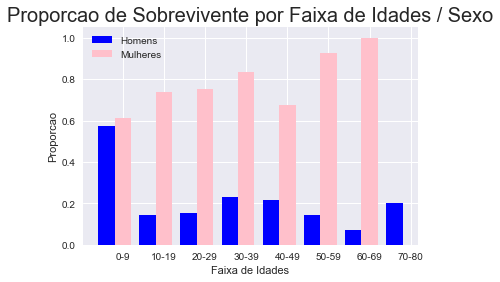

In [85]:
# Posicionamento no gráfico
posicao_homens = np.array(range(len(faixa_idades)))
posicao_mulheres = np.array(range(len(faixa_idades)))+0.4

# Plotagem
ax = plt.subplot()
ax.bar(posicao_homens, dados_homens,width=0.4,label='Homens',color='blue')
ax.bar(posicao_mulheres, dados_mulheres,width=0.4,label='Mulheres',color='pink')

# Inserindo o faixa de idade
espacamento = np.array(range(len(faixa_idades)))+0.4
plt.xticks(espacamento,  faixa_idades)

ax.set_ylabel("Proporcao")
ax.set_xlabel("Faixa de Idades")
ax.set_title("Proporcao de Sobrevivente por Faixa de Idades / Sexo",fontsize=20)
plt.legend(loc='best')
plt.show()

##### Conforme o gráfico da amostra, podemos observar um número maior de mulheres e crianças sobreviventes.

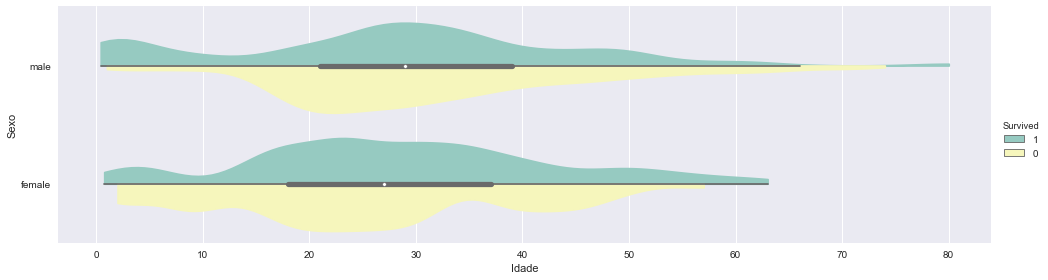

In [86]:
# Outro tipo de gráficos para melhor visualização
%matplotlib inline
plot1 = sns.factorplot('Age','Sex', hue = 'Survived', data = titanic_df, hue_order = [1,0],
                       orient="h",  aspect=3.5, palette="Set3",
                       kind="violin", split=True, cut=0, bw=.2)
(plot1.set_axis_labels("Idade", "Sexo"))

#### Depois de plotar no gráfico a relação de Faixa de Idade / Sexo dos sobreviventes, observamos que mulheres e crianças tiveram uma proporção maior de sobreviventes. Isso suporta a teoria de que os primeiros acentos cedidos nos botes foram para mulheres e crianças.

## 10. Conclusão

##### Com base na amostra e nos resultados obtidos através dela, teoricamente as mulheres e crianças tiveram um maior número de sobreviventes no acidente, mas temos alguma limitações na análise, que serão citadas abaixo.

### 10.1 Limitações da análise:

1. Dados incompletos
2. Apenas uma amostra foi retirada dos dados
3. O números de idades que faltam na amostra, podem desviar os resultados
4. A correlação não implica em causalidade. As conclusões são baseadas no conjunto de dados fornecidos. Para obter a causalidade real, deveriamos conduzir o experimento controlado que provavelmente não é possível.

### 10.2 Outras variáveis

1. Distinção entre passageiros e tripulação - Não é feita esta distinção, e essa é uma variável que pode ter uma influência na análise proposta
2. Ordem de alocação nos botes - Isso pode afetar diretamente no resultado do maior número de sobreviventes tender para um sexo/idade específica